In [6]:
import numpy as np
import torch
from pprint import pprint
import random

from ffcv.fields import JSONField
from load_ffcv_dataset import load_ffcv_dataset
from utils.datasets import create_dataloader
from write_ffcv_dataset import CocoBoundingBox

In [2]:
BATCH_SIZE = 16
torch.set_printoptions(threshold=1000)

In [3]:
%%capture
split = 'val'
path = '/mnt/nfs/home/branhung/src/datasets/coco-box/' + split + ('-dev2017.txt' if split == 'test' else '2017.txt')
imgsz, batch_size, stride = 640, 16, 32
default_loader = create_dataloader(path, imgsz, batch_size, stride)[0]
default_loader = [s for s in default_loader]
ffcv_loader = load_ffcv_dataset('coco_box', BATCH_SIZE)['val']
ffcv_loader = [[s[0].cpu(), s[1].cpu(), s[2].cpu(), s[3].cpu(), s[4].cpu()] for s in ffcv_loader]

In [4]:
def ffcv_collate(labels, label_lengths):
    labels[:,:,0] = torch.arange(BATCH_SIZE).unsqueeze(1)
    splitter = torch.vstack([label_lengths, labels.size()[1]-label_lengths]).T.flatten().tolist()
    return torch.cat(torch.split(labels.reshape((-1, 6)), splitter)[::2],0)

In [8]:
test_index = random.randint(0, 300)
torch.allclose(ffcv_collate(ffcv_loader[test_index][1], ffcv_loader[test_index][4]).float(), default_loader[test_index][1])

True

In [4]:
experimental_set = CocoBoundingBox(path, imgsz)

Scanning '/mnt/nfs/home/branhung/src/datasets/coco-box/val2017.cache' images and labels... 4952 found, 48 missing, 0 empty, 0 corrupt: 100%|██████████| 5000/5000 [00:00<?, ?it/s]


In [83]:
np.concatenate(experimental_set.labels, 0)[:, 0].max()

79.0

In [9]:
def all_sorted_samples(loader_list):
    debatch = []
    for batch in loader_list:
        debatch += [[batch[j][i] for j in range(len(batch))] for i in range(len(batch[0]))] # batch is a 4 x 16
    debatch = sorted(debatch, key = lambda x: x[2])
    return debatch

def all_ffcv_samples(loader_list):
    debatch = []
    for batch in loader_list:
        debatch += [[batch[0][i], batch[1][i], JSONField.unpack(batch[2][i].numpy()), JSONField.unpack(batch[3][i].numpy()), batch[4][i]] for i in range(len(batch[0]))] # batch is a 4 x 16
    debatch = sorted(debatch, key = lambda x: x[2])
    return debatch

In [10]:
ffcv_samples = all_ffcv_samples(ffcv_loader)

In [39]:
default_samples = all_sorted_samples(default_loader)

In [56]:
ffcv_samples[1][0]

tensor([[[114, 114, 114,  ..., 114, 114, 114],
         [114, 114, 114,  ..., 114, 114, 114],
         [114, 114, 114,  ..., 114, 114, 114],
         ...,
         [114, 114, 114,  ..., 114, 114, 114],
         [114, 114, 114,  ..., 114, 114, 114],
         [114, 114, 114,  ..., 114, 114, 114]],

        [[114, 114, 114,  ..., 114, 114, 114],
         [114, 114, 114,  ..., 114, 114, 114],
         [114, 114, 114,  ..., 114, 114, 114],
         ...,
         [114, 114, 114,  ..., 114, 114, 114],
         [114, 114, 114,  ..., 114, 114, 114],
         [114, 114, 114,  ..., 114, 114, 114]],

        [[114, 114, 114,  ..., 114, 114, 114],
         [114, 114, 114,  ..., 114, 114, 114],
         [114, 114, 114,  ..., 114, 114, 114],
         ...,
         [114, 114, 114,  ..., 114, 114, 114],
         [114, 114, 114,  ..., 114, 114, 114],
         [114, 114, 114,  ..., 114, 114, 114]]], dtype=torch.uint8)

In [43]:
all_unique_filenames = {s[2] for s in ffcv_samples}
print(len(all_unique_filenames))

4968


In [9]:
[s[2] for s in default_samples[:20]]

['/mnt/nfs/home/branhung/src/datasets/coco-box/images/val2017/000000000139.jpg',
 '/mnt/nfs/home/branhung/src/datasets/coco-box/images/val2017/000000000285.jpg',
 '/mnt/nfs/home/branhung/src/datasets/coco-box/images/val2017/000000000632.jpg',
 '/mnt/nfs/home/branhung/src/datasets/coco-box/images/val2017/000000000724.jpg',
 '/mnt/nfs/home/branhung/src/datasets/coco-box/images/val2017/000000000776.jpg',
 '/mnt/nfs/home/branhung/src/datasets/coco-box/images/val2017/000000000785.jpg',
 '/mnt/nfs/home/branhung/src/datasets/coco-box/images/val2017/000000000802.jpg',
 '/mnt/nfs/home/branhung/src/datasets/coco-box/images/val2017/000000000872.jpg',
 '/mnt/nfs/home/branhung/src/datasets/coco-box/images/val2017/000000000885.jpg',
 '/mnt/nfs/home/branhung/src/datasets/coco-box/images/val2017/000000001000.jpg',
 '/mnt/nfs/home/branhung/src/datasets/coco-box/images/val2017/000000001268.jpg',
 '/mnt/nfs/home/branhung/src/datasets/coco-box/images/val2017/000000001296.jpg',
 '/mnt/nfs/home/branhung/src

In [10]:
[s[2] for s in ffcv_samples[:20]]

['../ffcv/../../datasets/coco-box/images/val2017/000000000139.jpg',
 '../ffcv/../../datasets/coco-box/images/val2017/000000000285.jpg',
 '../ffcv/../../datasets/coco-box/images/val2017/000000000632.jpg',
 '../ffcv/../../datasets/coco-box/images/val2017/000000000724.jpg',
 '../ffcv/../../datasets/coco-box/images/val2017/000000000776.jpg',
 '../ffcv/../../datasets/coco-box/images/val2017/000000000785.jpg',
 '../ffcv/../../datasets/coco-box/images/val2017/000000000802.jpg',
 '../ffcv/../../datasets/coco-box/images/val2017/000000000872.jpg',
 '../ffcv/../../datasets/coco-box/images/val2017/000000000885.jpg',
 '../ffcv/../../datasets/coco-box/images/val2017/000000001000.jpg',
 '../ffcv/../../datasets/coco-box/images/val2017/000000001268.jpg',
 '../ffcv/../../datasets/coco-box/images/val2017/000000001296.jpg',
 '../ffcv/../../datasets/coco-box/images/val2017/000000001353.jpg',
 '../ffcv/../../datasets/coco-box/images/val2017/000000001425.jpg',
 '../ffcv/../../datasets/coco-box/images/val2017

In [27]:
import torch

diff = 0
for i in range(len(default_loader)):
    if not torch.allclose(default_loader[i][0], ffcv_loader[i][0]):

0


In [41]:
default_samples[1]

[tensor([[[114, 114, 114,  ..., 114, 114, 114],
          [114, 114, 114,  ..., 114, 114, 114],
          [114, 114, 114,  ..., 114, 114, 114],
          ...,
          [114, 114, 114,  ..., 114, 114, 114],
          [114, 114, 114,  ..., 114, 114, 114],
          [114, 114, 114,  ..., 114, 114, 114]],
 
         [[114, 114, 114,  ..., 114, 114, 114],
          [114, 114, 114,  ..., 114, 114, 114],
          [114, 114, 114,  ..., 114, 114, 114],
          ...,
          [114, 114, 114,  ..., 114, 114, 114],
          [114, 114, 114,  ..., 114, 114, 114],
          [114, 114, 114,  ..., 114, 114, 114]],
 
         [[114, 114, 114,  ..., 114, 114, 114],
          [114, 114, 114,  ..., 114, 114, 114],
          [114, 114, 114,  ..., 114, 114, 114],
          ...,
          [114, 114, 114,  ..., 114, 114, 114],
          [114, 114, 114,  ..., 114, 114, 114],
          [114, 114, 114,  ..., 114, 114, 114]]], dtype=torch.uint8),
 tensor([ 0.00000, 62.00000,  0.12764,  0.50343,  0.23331,  0.1

In [42]:
ffcv_samples[3]

[tensor([[[114, 114, 114,  ..., 114, 114, 114],
          [114, 114, 114,  ..., 114, 114, 114],
          [114, 114, 114,  ..., 114, 114, 114],
          ...,
          [114, 114, 114,  ..., 114, 114, 114],
          [114, 114, 114,  ..., 114, 114, 114],
          [114, 114, 114,  ..., 114, 114, 114]],
 
         [[114, 114, 114,  ..., 114, 114, 114],
          [114, 114, 114,  ..., 114, 114, 114],
          [114, 114, 114,  ..., 114, 114, 114],
          ...,
          [114, 114, 114,  ..., 114, 114, 114],
          [114, 114, 114,  ..., 114, 114, 114],
          [114, 114, 114,  ..., 114, 114, 114]],
 
         [[114, 114, 114,  ..., 114, 114, 114],
          [114, 114, 114,  ..., 114, 114, 114],
          [114, 114, 114,  ..., 114, 114, 114],
          ...,
          [114, 114, 114,  ..., 114, 114, 114],
          [114, 114, 114,  ..., 114, 114, 114],
          [114, 114, 114,  ..., 114, 114, 114]]], dtype=torch.uint8),
 tensor([[ 0.00000e+00,  1.10000e+01,  4.99630e-01,  2.96740e-0

In [57]:
tst = random.randint(0, 4999)

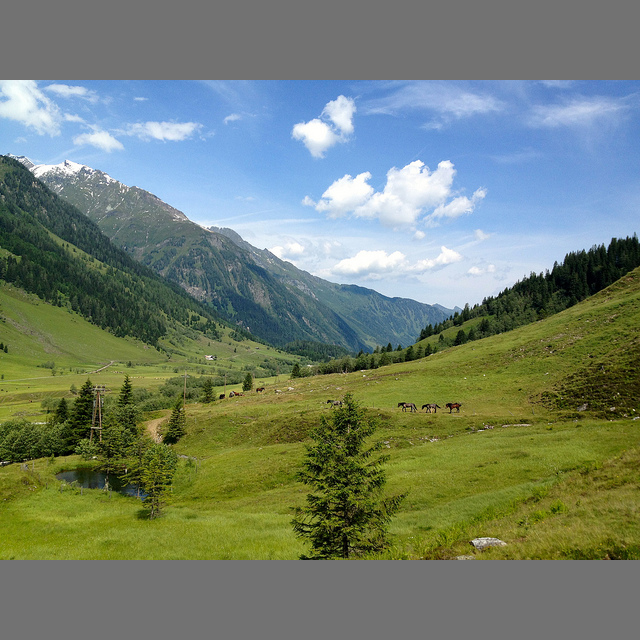

In [58]:
import torchvision.transforms as T

display_image = T.ToPILImage()

default_img = default_samples[tst][0]
display_image(default_img)

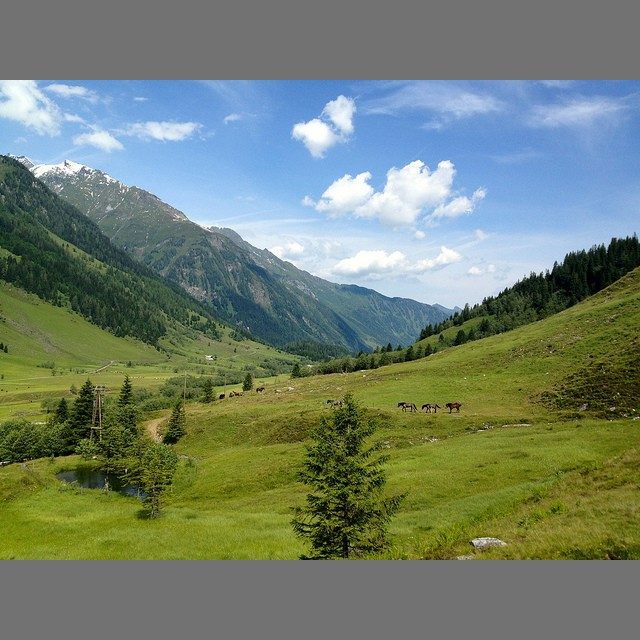

In [59]:
ffcv_img = ffcv_samples[tst][0]
display_image(ffcv_img)

In [ ]:
FILENAME = '/mnt/nfs/home/branhung/src/datasets/coco-box/images/val2017/000000572388.jpg'
searcher = [s for s in default_samples if s[2] == FILENAME]
searcher

In [ ]:
from write_ffcv_dataset import CocoBoundingBox
from torch.utils.data import DataLoader

test_loader = DataLoader(CocoBoundingBox('/mnt/nfs/home/branhung/src/datasets/coco-box/val2017.txt'))

In [ ]:
test_loader = [s for s in test_loader]

In [ ]:
TEST_FILENAME = '../ffcv/../../datasets/coco-box/images/val2017/000000572388.jpg'
test_searcher = [s for s in test_loader if s[2] == TEST_FILENAME]

In [ ]:
test_idx_set = CocoBoundingBox('/mnt/nfs/home/branhung/src/datasets/coco-box/val2017.txt')

In [ ]:
test_idx_set[-1]

In [ ]:
default_loader[0]